# Drawception EDA

This Notebook is where I play with the drawception data.

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils

import os
import PIL
import PIL.Image

In [24]:
# Grab the data
drawception = pd.read_csv('drawception_master.csv')

In [3]:
drawception.head(3)

,pre_caption,post_caption,image_url,author,panel_number,LIKE,HAHA,WOW,LOVE,DUCK,game_url,player_num,game_date,game_tags
0,Guitar,brown guitar,https://cdn.drawception.com/drawings/1032692/1...,Alexyeaheyaha,2,0,0,0,0,0,/game/YC8aMef8Ox/guitar/,12,"December 18th, 2020",['blitz mode']
1,brown guitar,Guitar,https://cdn.drawception.com/drawings/1041492/c...,celemon,4,0,0,0,0,0,/game/YC8aMef8Ox/guitar/,12,"December 18th, 2020",['blitz mode']
2,Guitar,acoustic guitar,https://cdn.drawception.com/drawings/681336/dz...,Sarramiah and Daughter,6,0,0,0,0,0,/game/YC8aMef8Ox/guitar/,12,"December 18th, 2020",['blitz mode']


In [4]:
# Add a total reactions feature
drawception['REACT'] = drawception['LIKE']+drawception['HAHA']+drawception['WOW']+drawception['LOVE']+drawception['DUCK']

## Just try and copy the tensorflow example

https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
batch_size = 16
img_height = 500
img_width = 600

## PLAYING WITH IMAGES

In [ ]:
drawception[drawception['game_tags'] != '[]']['REACT'].mean()

In [ ]:
drawception[drawception['game_tags'] == '[]']['REACT'].mean()

In [ ]:
drawception['REACT'].mean()

In [ ]:
drawception[drawception['DUCK']>2]

In [14]:
my_string = 'cute dog'
drawception[drawception['pre_caption'].str.lower().str.contains(my_string) | drawception['post_caption'].str.lower().str.contains(my_string)].sort_values(by='REACT', ascending=False).head(5)

,pre_caption,post_caption,image_url,author,panel_number,LIKE,HAHA,WOW,LOVE,DUCK,game_url,player_num,game_date,game_tags,REACT
18780,cute dog,Shy arctic fox wagging its tail,https://cdn.drawception.com/drawings/1007419/W...,Luke1203,6,0,0,0,7,0,/game/sfeP3aOWpj/petite-wolf/,12,"December 25th, 2020",[],7
18779,Tiny baby wolf cub,cute dog,https://cdn.drawception.com/drawings/747580/5l...,ILiveOnEarth,4,0,0,0,6,0,/game/sfeP3aOWpj/petite-wolf/,12,"December 25th, 2020",[],6
8147,Cute dog floating in bubble,Dog inside Bubble,https://cdn.drawception.com/drawings/919451/68...,Fried Egg,12,2,0,0,3,0,/game/OkQ5aGpSn5/toxic-dog/,15,"December 21st, 2020",['cga'],5
8146,dog in a bubble,Cute dog floating in bubble,https://cdn.drawception.com/drawings/817135/tl...,UniverseCat34,10,0,0,0,4,0,/game/OkQ5aGpSn5/toxic-dog/,15,"December 21st, 2020",['cga'],4
12637,hot punk person with cute dog,girl in leather jacket hugging a cat,https://cdn.drawception.com/drawings/1037188/n...,koiwi,8,0,0,0,2,0,/game/M1yLTyXRMp/frisk-from-undertale-has-sans...,12,"December 22nd, 2020",[],2


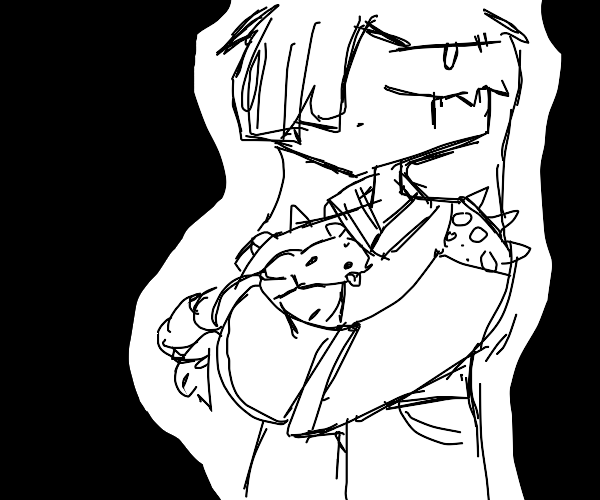

In [19]:
# This line gets the string path for image row index
index = 12637
img_0 = '/'.join(drawception.iloc[index,2].split('/')[3:6])
PIL.Image.open(img_0)

In [20]:
base_url = 'https://drawception.com'
base_url+drawception.iloc[index,10]

'https://drawception.com/game/M1yLTyXRMp/frisk-from-undertale-has-sans-on-a-leash/'

In [ ]:
test_img = PIL.Image.open(img_0)

In [ ]:
type(test_img)

In [ ]:
test_img.format

In [21]:
drawception.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38058 entries, 0 to 38057
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pre_caption   38058 non-null  object
 1   post_caption  38058 non-null  object
 2   image_url     38058 non-null  object
 3   author        38058 non-null  object
 4   panel_number  38058 non-null  int64 
 5   LIKE          38058 non-null  int64 
 6   HAHA          38058 non-null  int64 
 7   WOW           38058 non-null  int64 
 8   LOVE          38058 non-null  int64 
 9   DUCK          38058 non-null  int64 
 10  game_url      38058 non-null  object
 11  player_num    38058 non-null  int64 
 12  game_date     38058 non-null  object
 13  game_tags     38058 non-null  object
 14  REACT         38058 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 4.4+ MB


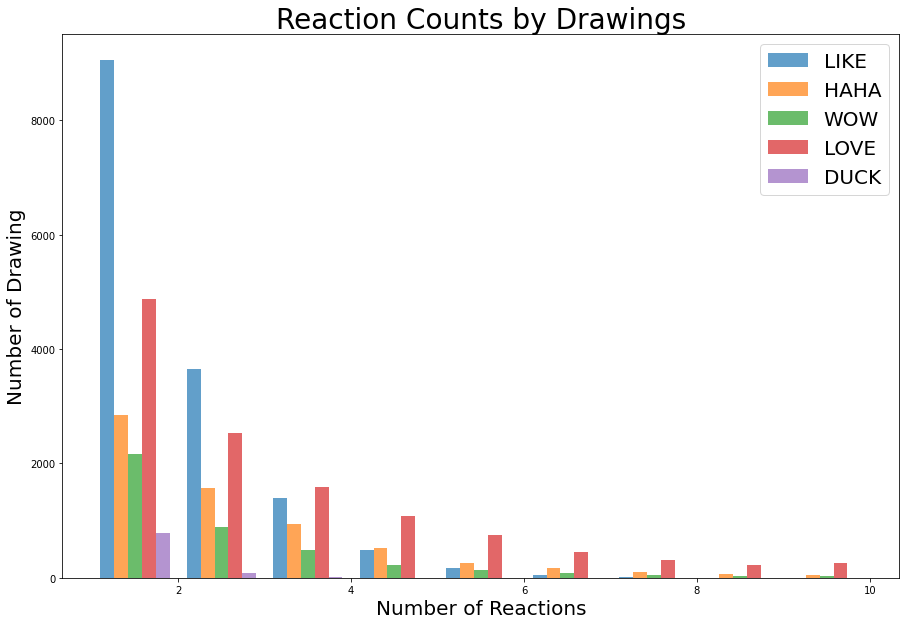

In [26]:
bins = np.linspace(1, 10, 10)

plt.figure(figsize=(15,10))

plt.hist([drawception['LIKE'],drawception['HAHA'],drawception['WOW'],drawception['LOVE'],drawception['DUCK']], 
         bins, 
         alpha=0.7, 
         label=['LIKE','HAHA','WOW','LOVE','DUCK'])

plt.title('Reaction Counts by Drawings', size=28)
plt.xlabel('Number of Reactions', size=20)
plt.ylabel('Number of Drawing', size=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()